# Линейные модели. Задачи регрессии и классификации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, SGDClassifier, Ridge, Lasso

## Линейная регрессия

### Подготовка данных

In [2]:
df = pd.read_excel('Concrete_Data.xls', sheet_name='Sheet1')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [5]:
df = df.rename(lambda x: x.split('(')[0].strip().replace(' ', '_').lower(), axis=1)

In [6]:
df.duplicated().sum()

25

In [7]:
df = df.drop_duplicates()

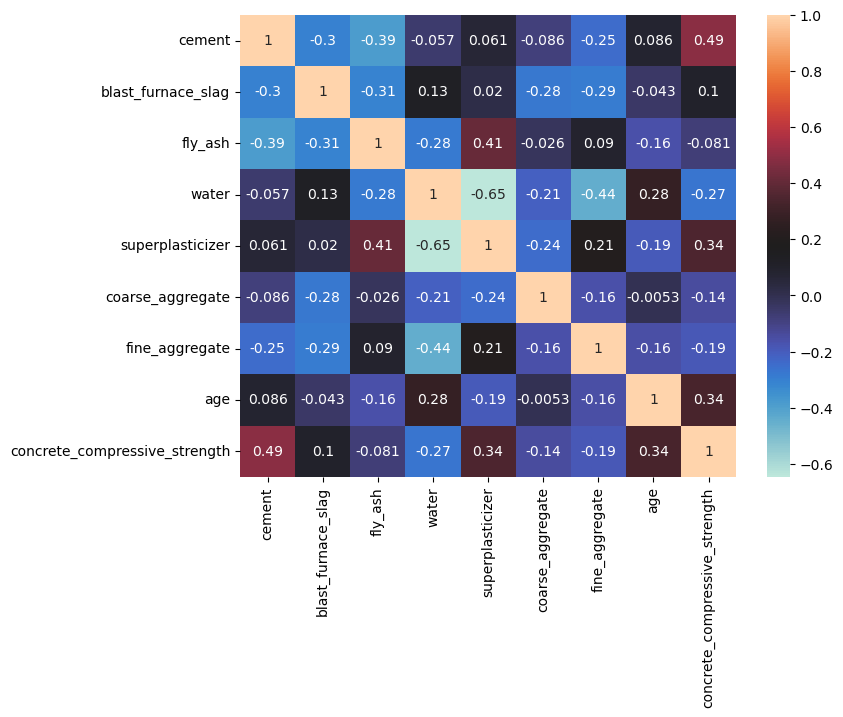

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='icefire');

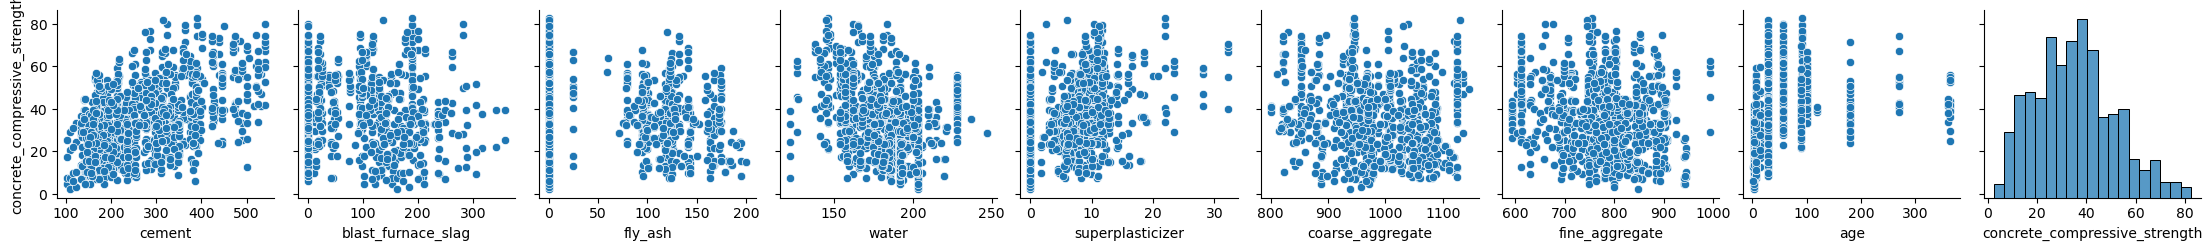

In [9]:
sns.pairplot(df, y_vars='concrete_compressive_strength');

In [10]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Подготовка выборок

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['concrete_compressive_strength'], axis=1),
                                                    df['concrete_compressive_strength'],
                                                    test_size=0.2,
                                                    random_state=177013,
                                                    shuffle=True,
                                                    )

In [12]:
X_train_b = X_train.copy()
X_train_b['bias'] = 1

X_test_b = X_test.copy()
X_test_b['bias'] = 1

In [13]:
weights = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

In [14]:
weights.rename(lambda x: df.columns[x] if x != len(weights) - 1 else 'bias')

cement                 0.128867
blast_furnace_slag     0.112246
fly_ash                0.101144
water                 -0.118545
superplasticizer       0.210435
coarse_aggregate       0.020884
fine_aggregate         0.029831
age                    0.112074
bias                 -42.509181
dtype: float64

In [15]:
y_pred = X_test_b @ weights.values

In [16]:
y_pred

384    50.298257
395    29.928588
300    34.136851
753    51.489756
915    33.846153
         ...    
778    19.625440
845    40.190523
484    56.323739
210    22.591681
124    50.843700
Length: 201, dtype: float64

## Метрики регрессии

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Среднеквадратичная ошибка (MSE)

In [18]:
((y_test - y_pred)**2).mean()

127.22262659953577

In [19]:
((y_test - y_train.mean())**2).mean()

261.0758851507504

In [20]:
mean_squared_error(y_test, y_pred)

127.22262659953577

### Средняя абсолютная ошибка (MAE)

In [21]:
(abs(y_test - y_pred)).mean()

9.120506085005252

In [22]:
mean_absolute_error(y_test, y_pred)

9.120506085005252

### Коэффициент детерминации ($R^2$)

In [23]:
1 - mean_squared_error(y_test, y_pred) / y_test.var(ddof=0)

0.5079524191932643

In [24]:
r2_score(y_test, y_pred)

0.5079524191932643

In [25]:
def show_regression_metrics(y_true, y_pred):
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
    print(f'R2: {r2_score(y_true, y_pred)}')

## Линейная регрессия в sklearn

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
show_regression_metrics(y_test, y_pred)

MSE: 127.22262659958565
MAE: 9.120506085007069
R2: 0.5079524191930713


## Градиентный спуск

In [30]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
X_train_b = scaler.transform(X_train)
X_train_b = np.hstack([X_train_b, np.ones((len(X_train), 1))])

In [34]:
X_test_b = scaler.transform(X_test)
X_test_b = np.hstack([X_test_b, np.ones((len(X_test), 1))])

In [35]:
weights = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

In [36]:
pd.Series(weights, index=[df.columns[x] for x in range(len(weights) - 1)] + ['bias'])

cement                13.524990
blast_furnace_slag     9.662659
fly_ash                6.531974
water                 -2.542741
superplasticizer       1.252139
coarse_aggregate       1.622297
fine_aggregate         2.406614
age                    7.007011
bias                  34.932889
dtype: float64

$$
\frac{\partial MSE}{\partial w} = \frac{\partial MSE}{\partial y_{pred}} \frac{\partial y_{pred}}{\partial w}
$$

$$
\frac{\partial MSE}{\partial y_{pred}} = \frac{\partial(y-y_{pred})^2}{\partial y_{pred}} = \frac{\partial(y^2-2y\cdot y_{pred}+y_{pred}^2)}{\partial y_{pred}} = 2(y_{pred} - y)
$$

$$
\frac{\partial y_{pred}}{\partial w} = \frac{(\partial X \cdot w)}{\partial w} = X
$$

In [37]:
num_iterations = 100
learning_rate = 1e-4
msetrain = []
msetest = []
checkpoints = []

improved_weights = np.zeros(len(X_train.columns) + 1)

for _ in range(num_iterations):
    preds = X_train_b @ improved_weights
    
    # d(MSE) / d(preds)
    error = preds - y_train 
    msetrain.append(mean_squared_error(y_train, preds))
    msetest.append(mean_squared_error(y_test, X_test_b @ improved_weights))
    
    # d(MSE) / d(weights)
    gradient = X_train_b.T @ error
    
    improved_weights -= learning_rate * gradient
    checkpoints.append(improved_weights)

In [38]:
weights

array([13.52498966,  9.66265883,  6.53197389, -2.54274148,  1.25213852,
        1.62229749,  2.40661437,  7.007011  , 34.93288884])

In [39]:
improved_weights

array([ 8.2591323 ,  4.45621172,  1.7519388 , -5.77390343,  1.8854661 ,
       -1.72109067, -2.24370115,  6.74857664, 34.92488809])

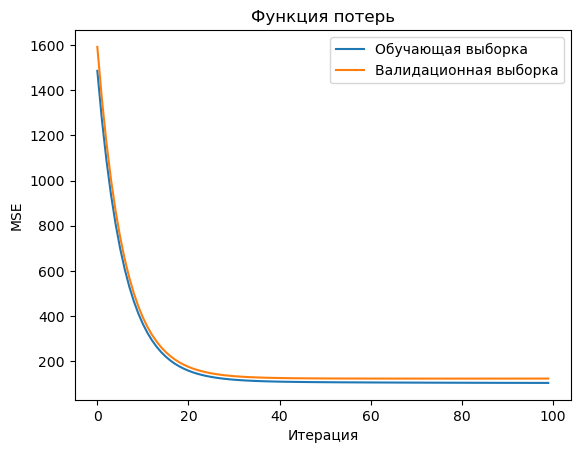

In [40]:
plt.plot(msetrain);
plt.plot(msetest);
plt.title('Функция потерь')
plt.xlabel('Итерация')
plt.ylabel('MSE');
plt.legend(['Обучающая выборка', 'Валидационная выборка']);

In [41]:
y_pred = X_test_b @ improved_weights

In [42]:
show_regression_metrics(y_test, y_pred)

MSE: 123.08990223956083
MAE: 9.053900814586177
R2: 0.5239361877870983


In [43]:
np.argmin(msetest)

77

In [44]:
final_weights = checkpoints[np.argmin(msetest)]

In [45]:
y_pred = X_test_b @ final_weights

In [46]:
show_regression_metrics(y_test, y_pred)

MSE: 123.08990223956083
MAE: 9.053900814586177
R2: 0.5239361877870983


### Градиентный спуск в sklearn

In [47]:
sgd = SGDRegressor(random_state=177013, penalty=None)

In [48]:
sgd.fit(X_train_b, y_train)

SGDRegressor(penalty=None, random_state=177013)

In [49]:
y_pred = sgd.predict(X_test_b)

In [50]:
show_regression_metrics(y_test, y_pred)

MSE: 125.53643489398263
MAE: 9.108511024730786
R2: 0.5144739521286394


## Допущения линейной регрессии

- Линейность: подразумевается наличие линейной зависимости (но вы можете преобразовать признаки, чтобы ее обеспечить!).
- Слабая экзогенность: выборка не должна зывисеть от внешних факторов, погрешность измерений скажется на погрешности предсказаний.
- Отсутствие мультиколлинеарности: признаки не должны сильно коррелировать.
- Нормальность ошибки: ошибка предсказания должна распределяться нормально (и иметь матожидание около нуля):

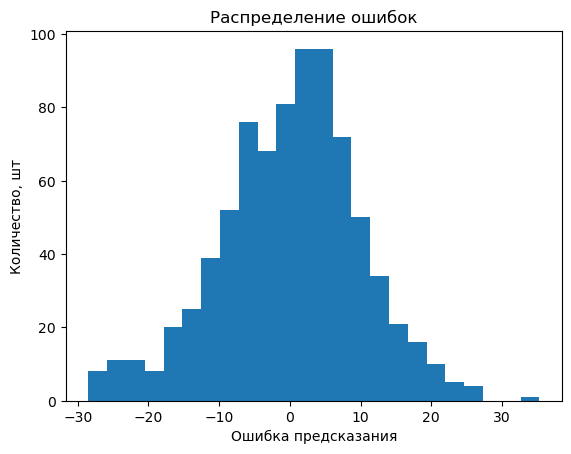

In [51]:
plt.hist(y_train - lr.predict(X_train), bins='fd');
plt.title('Распределение ошибок')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Количество, шт');

- Гомоскедастичность: дисперсия ошибки должна быть постоянной:

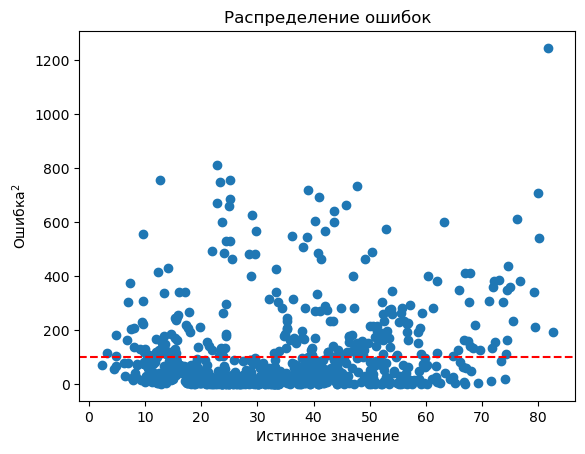

In [52]:
plt.scatter(y_train, (y_train - lr.predict(X_train)) ** 2);
plt.axhline(np.mean((y_train - lr.predict(X_train)) ** 2), color='red', linestyle='--')
plt.title('Распределение ошибок')
plt.xlabel('Истинное значение')
plt.ylabel('Ошибка$^2$');

- Независимость ошибок: проверяется с помощью DW-теста (значения статистики в норме от 1.5 до 2.5):

In [53]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(y_train - lr.predict(X_train))

2.0332034454062633

Большинство проблем можно решить одним махом, преобразовав входные данные с целью уменьшить их асимметрию. Обычное шкалирование почти не влияет на аналитическое решение, но необходимо для градиентного спуска. Однако есть методы, которые не только нормализуют данные, но и корректируют их форму:

- `PowerTransformer` - параметрический преобразователь, стабилизирующий дисперсию и уменьшающий скошенность методом максимального правдоподобия;
- `QuantileTransformer` - непараметрический преобразователь, превращающий распределение в равномерное или нормальное через PPF.

Платой за такое удобство является некоторое искажение линейных зависимостей.

In [54]:
from sklearn.pipeline import Pipeline

In [55]:
for scaler in [
                StandardScaler(),
                QuantileTransformer(output_distribution='uniform', random_state=177013),
                QuantileTransformer(output_distribution='normal', random_state=177013),
                PowerTransformer(),
              ]:

    pipe = Pipeline([
                        ('scaler', scaler),
                        ('model', LinearRegression()),
                    ])
    
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f'Предобработка: {scaler}')
    show_regression_metrics(y_test, y_pred)
    print()

Предобработка: StandardScaler()
MSE: 127.22262659958567
MAE: 9.120506085007069
R2: 0.5079524191930713

Предобработка: QuantileTransformer(random_state=177013)
MSE: 60.52916431528634
MAE: 6.198911662916123
R2: 0.7658967617188096

Предобработка: QuantileTransformer(output_distribution='normal', random_state=177013)
MSE: 75.36212163475052
MAE: 6.68938146868037
R2: 0.7085286585729298

Предобработка: PowerTransformer()
MSE: 59.12474403267872
MAE: 6.022246461034131
R2: 0.7713285125084566



/home/daiyousei/.conda/envs/DS310/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (804). n_quantiles is set to n_samples.
  warnings.warn(
/home/daiyousei/.conda/envs/DS310/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (804). n_quantiles is set to n_samples.
  warnings.warn(


## Регуляризация

In [56]:
for model in [
                Lasso(random_state=177013),
                Ridge(random_state=177013),
              ]:

    pipe = Pipeline([
                        ('scaler', PowerTransformer()),
                        ('model', model),
                    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f'Модель: {model}, веса: {model.coef_}')
    show_regression_metrics(y_test, y_pred)
    print()

Модель: Lasso(random_state=177013), веса: [ 7.82071974  3.91725857  0.         -3.17137797  2.39663317 -0.
 -0.23532012  8.5970446 ]
MSE: 66.23943875183123
MAE: 6.288583769423573
R2: 0.7438116437068323

Модель: Ridge(random_state=177013), веса: [ 8.90245539  5.09838507  1.13124749 -5.44793353  1.34105054 -0.78337229
 -1.61053766  9.74261771]
MSE: 59.11241945077917
MAE: 6.0226223330389566
R2: 0.7713761791922078



# Логистическая регрессия

## Подготовка данных

In [57]:
df = pd.read_csv('titanic.csv')

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
df.duplicated().sum()

0

In [61]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [62]:
df['Sex'] = (df['Sex'] == 'male').astype('int')

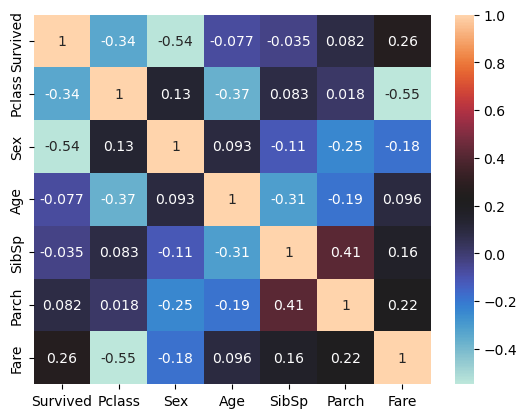

In [63]:
sns.heatmap(df.corr(), annot=True, cmap='icefire');

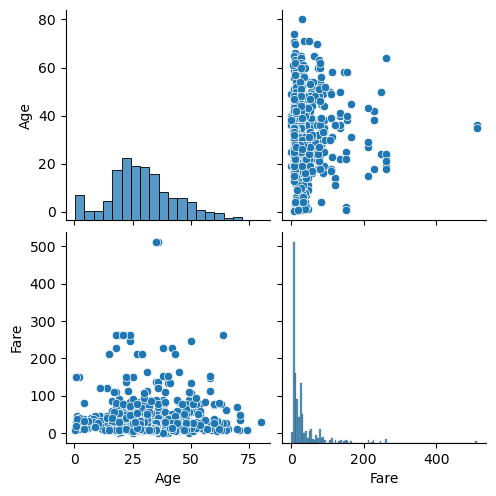

In [64]:
sns.pairplot(df[['Age', 'Fare']]);

In [65]:
df.groupby('Pclass')['Age'].agg(['count', 'mean', 'median'])

,count,mean,median
Pclass,,,
1,186,38.233441,37.0
2,173,29.877630,29.0
3,355,25.140620,24.0


In [66]:
df.groupby('SibSp')['Age'].agg(['count', 'mean', 'median', lambda x: x.isna().sum()])

,count,mean,median,<lambda_0>
SibSp,,,,
0,471,31.397558,29.0,137
1,183,30.089727,30.0,26
2,25,22.620000,23.0,3
3,12,13.916667,9.5,4
4,18,7.055556,6.5,0
5,5,10.200000,11.0,0
8,0,NaN,NaN,7


In [67]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'SibSp'])['Age'].transform('median'))
df = df.dropna()

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## Разбиение на выборки

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),
                                                    df['Survived'],
                                                    test_size=0.2,
                                                    random_state=177013,
                                                    shuffle=True,
                                                    stratify=df['Survived'])

In [70]:
X_train_b = X_train.copy()
X_train_b['bias'] = 1

X_test_b = X_test.copy()
X_test_b['bias'] = 1

In [71]:
weights = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

In [72]:
weights

0   -0.186331
1   -0.497133
2   -0.006066
3   -0.051657
4   -0.033305
5    0.000544
6    1.328394
dtype: float64

In [73]:
y_logits = X_test_b @ weights.values

In [74]:
y_logits.describe()

count    177.000000
mean       0.352304
std        0.290484
min       -0.151190
25%        0.118842
50%        0.270192
75%        0.585620
max        1.046547
dtype: float64

In [75]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [76]:
y_probs = y_logits.apply(sigmoid)

In [77]:
((y_probs > 0.5) == y_test).mean()

0.4124293785310734

In [78]:
1 - df['Survived'].mean()

0.6131221719457014

In [79]:
((y_probs > 0.62) == y_test).mean()

0.8192090395480226

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test, (y_probs > 0.62))

0.8192090395480226

## Метрики классификации

In [82]:
from sklearn.metrics import (f1_score, roc_auc_score, average_precision_score, confusion_matrix, roc_curve,
                             precision_recall_curve, classification_report, recall_score, precision_score,
                             log_loss, brier_score_loss)

### Метрики для оценки моделей

Для оценки статистической верности моделей нужна метрика, которая будет:

- классонезависимой;
- порогонезависимой.

В качестве альтернативного варианта можно уравнять число представителей класса в обучающей выборке (oversampling, undersampling, параметр `class_weights` в sklearn), чтобы иметь возможность использовать интуитивные метрики с порогом 0.5. Такой подход имеет массу недостатков:

 - четкий баланс классов еще не гарантирует, что 0.5 будет оптимальным порогом;
 - на каждый эксперимент с пропорцией требуется переобучить модель;
 - модель более склонна "уезжать" в продакшене.
 
Поэтому **если от вас прямо не требуют обратного, оценивайте модели по "честным" метрикам, а "интуитивные" оставьте для презентации заказчику.**

#### Log loss (кросс-энтропия)

In [83]:
-(y_test * np.log(y_probs) + (1 - y_test) * np.log(1-y_probs)).mean()

0.6723890312259971

In [84]:
log_loss(y_test, y_probs)

0.6723890312259971

#### Показатель Брайера для бинарной классификации

In [85]:
mean_squared_error(y_test, y_probs)

0.24084915179818164

In [86]:
brier_score_loss(y_test, y_probs)

0.24084915179818164

### Метрики для презентации. Матрица ошибок.

In [87]:
def calculate_metrics(target_test, probabilities):
    cmatrix = confusion_matrix(target_test, probabilities > 0.5)

    ap = average_precision_score(target_test, probabilities)
    fpr, tpr, _ = roc_curve(target_test, probabilities)
    roc_auc = roc_auc_score(target_test, probabilities)

    precision, recall, thresholds = precision_recall_curve(target_test, probabilities)
    f_scores = 2 * recall * precision / (recall + precision)
    best_thresh = thresholds[np.argmax(f_scores)]
    best_f = np.max(f_scores)
    best_acc = accuracy_score(target_test, (probabilities > best_thresh))
    best_cmatrix = confusion_matrix(target_test, (probabilities > best_thresh))

    return best_f, roc_auc, best_acc, ap, best_thresh, fpr, tpr, recall, precision, cmatrix, best_cmatrix

In [88]:
def visualize(target_test, probabilities):
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    axes[0].plot([0, 1], linestyle='--')
    axes[1].plot([0.5, 0.5], linestyle='--')

    best_f, roc_auc, acc, ap, best_thresh, fpr, tpr, recall, precision, cmatrix, best_cmatrix = calculate_metrics(target_test, probabilities)
    print(f'ROC_AUC: {roc_auc:.2f}, AP (PR_AUC): {ap:.2f}, наилучший F1: {best_f:.2f} с порогом {best_thresh:.2f} (accuracy {acc:.2f})')
    axes[0].plot (fpr, tpr);
    axes[1].plot (recall, precision);

    axes[0].set (xlabel='FPR', ylabel='TPR', title='ROC-кривая', xlim=(0,1), ylim=(0,1))
    axes[1].set (xlabel='Recall', ylabel='Precision', title='PR-кривая', xlim=(0,1), ylim=(0,1))
    plt.show()
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.heatmap(cmatrix, ax=axes[0], annot=True, cmap='Blues', fmt='d').set(title='Матрица ошибок', xlabel='Предсказание', ylabel='Реальность')
    sns.heatmap(best_cmatrix, ax=axes[1], annot=True, cmap='Blues', fmt='d').set(title='Матрица ошибок (оптимальный порог)', xlabel='Предсказание', ylabel='Реальность')

    
    return best_thresh

#### Порогозависимые метрики.

На каждом возможном пороге (а их число равно числу уникальных скоров в `predict_proba()` + 1 (как правило, это порого, равный нулю, на котором все классифицируется как положительный класс)) существует своя матрица ошибок и как следствие, много производных от нее метрик:

- **accuracy**: она нам уже знакома, это просто процент верно угаданных случаев;
- **recall**, он же **TPR** (True Positive Rate): TP/(TP + FN) - процент от реальных случаев положительного класса, которые модель обнаружила;
- **precision**: TP / (TP + FP) - процент от предсказанных случаев положительного класса, которые были верными;
- **F1**: среднегармоническое recall и precision.

#### Порогонезависимые метрики. ROC-кривая. PR-кривая.

Метрики, суммарные по всем порогам положительного класса, будут порогонезависимы (хотя и классоспецифичны). Наиболее часто используются площади под параметрическими кривыми:

- **ROC_AUC**: строится кривая FRP (FP/TN + FP) и TPR по всем порогам. Считается площадь под кривой.
- **Average precision (PR_AUC)**: строится кривая recall и precision по всем порогам. Считается площадь под кривой.

Также мы можем с их помощью выбрать порог, где соотношение этих метрик оптимально (например, дает наибольшую F1).

ROC_AUC: 0.83, AP (PR_AUC): 0.84, наилучший F1: 0.75 с порогом 0.64 (accuracy 0.82)


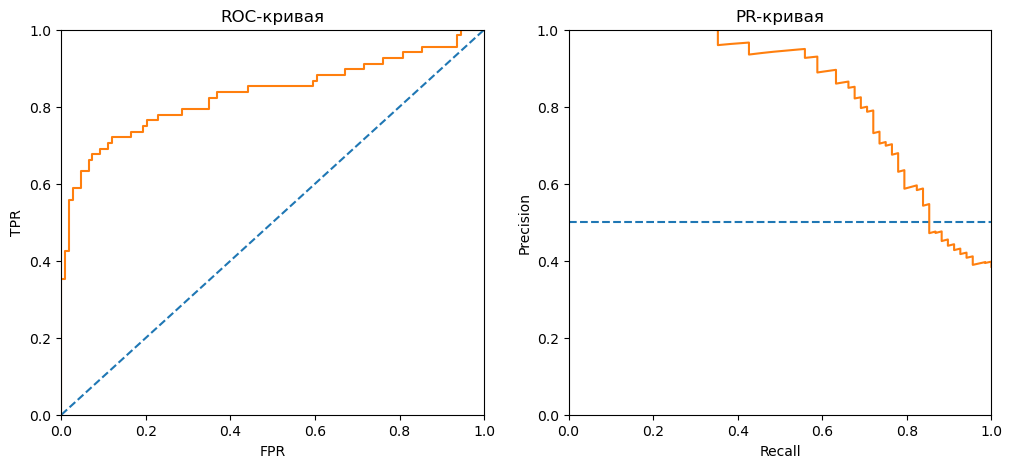

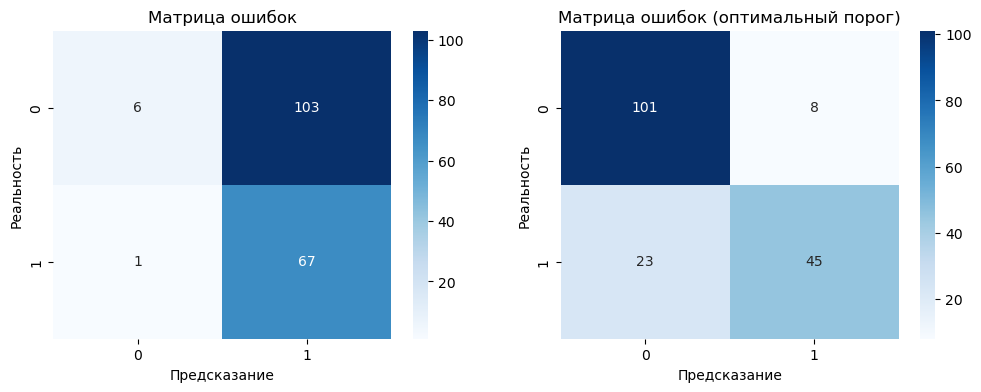

In [89]:
visualize(y_test, y_probs);

**Подбор оптимального порога относится к этапу принятия решения. Его следует проводить в финале исследования (ведь на практике может быть, к примеру, и несколько порогов с разными действиями).**

## Логистическая регрессия в sklearn

In [90]:
lr = LogisticRegression(random_state=177013, penalty=None)

In [91]:
lr.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=177013)

In [92]:
y_probs = lr.predict_proba(X_test)

In [93]:
y_probs[:5]

array([[0.44212827, 0.55787173],
       [0.9227669 , 0.0772331 ],
       [0.47889083, 0.52110917],
       [0.88589345, 0.11410655],
       [0.07985729, 0.92014271]])

ROC_AUC: 0.83, AP (PR_AUC): 0.83, наилучший F1: 0.74 с порогом 0.36 (accuracy 0.79)


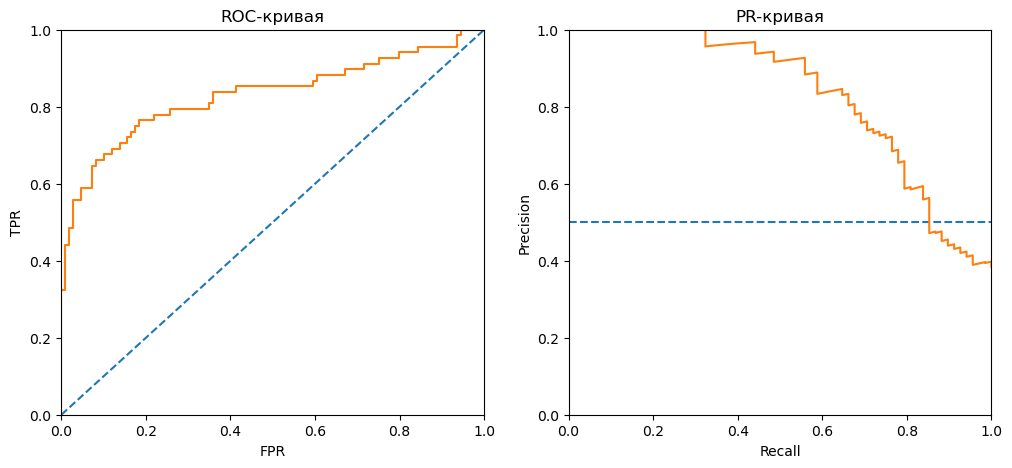

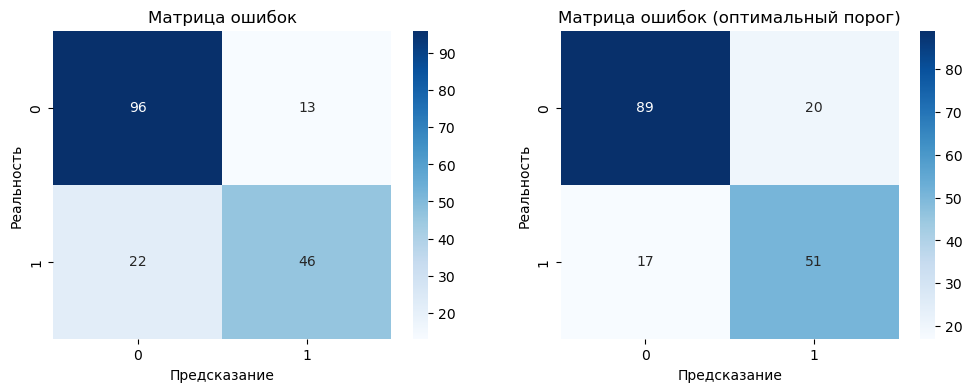

In [94]:
visualize(y_test, y_probs[:,1]);

In [95]:
lr.coef_

array([[-1.1856535 , -2.72300739, -0.04137708, -0.39608424, -0.19988843,
         0.00411163]])

In [96]:
lr.intercept_

array([5.17314142])

## Градиентный спуск

In [97]:
scaler.fit(X_train)
X_train_b = scaler.transform(X_train)
X_train_b = np.hstack([X_train_b, np.ones((len(X_train), 1))])
X_test_b = scaler.transform(X_test)
X_test_b = np.hstack([X_test_b, np.ones((len(X_test), 1))])

In [98]:
num_iterations = 100
learning_rate = 1e-4
nlltrain = []
nlltest = []
checkpoints = []

improved_weights = np.zeros(len(X_train.columns) + 1)

for _ in range(num_iterations):
    logits = X_train_b @ improved_weights
    
    probabilities = sigmoid(logits)
    
    error = probabilities - y_train
    nlltrain.append(log_loss(y_train, probabilities).mean())
    nlltest.append(log_loss(y_test, sigmoid(X_test_b @ improved_weights)).mean())
    
    gradient = X_train_b.T @ error
    
    improved_weights -= learning_rate * gradient
    checkpoints.append(improved_weights)

In [99]:
improved_weights

array([-0.47238501, -0.8232264 , -0.14786915, -0.04532908,  0.01143015,
        0.3549424 , -0.40532898])

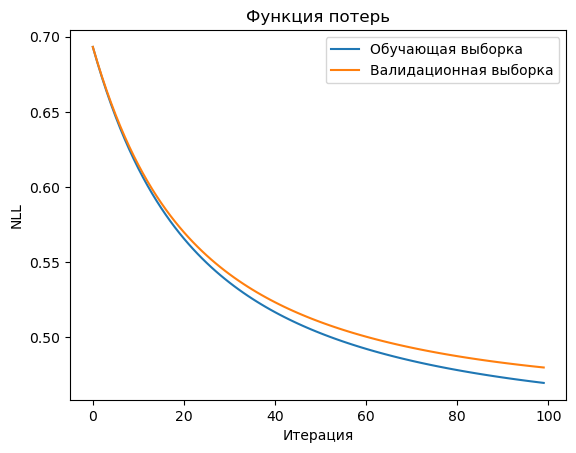

In [100]:
plt.plot(nlltrain);
plt.plot(nlltest);
plt.title('Функция потерь')
plt.xlabel('Итерация')
plt.ylabel('NLL');
plt.legend(['Обучающая выборка', 'Валидационная выборка']);

In [101]:
y_logits = X_test_b @ improved_weights
y_probs = sigmoid(y_logits)

In [102]:
accuracy_score(y_test, (y_probs > 0.5))

0.8022598870056498

In [103]:
np.argmin(msetest)

77

In [104]:
final_weights = checkpoints[np.argmin(msetest)]

In [105]:
y_logits = X_test_b @ final_weights
y_probs = sigmoid(y_logits)

ROC_AUC: 0.83, AP (PR_AUC): 0.83, наилучший F1: 0.76 с порогом 0.51 (accuracy 0.82)


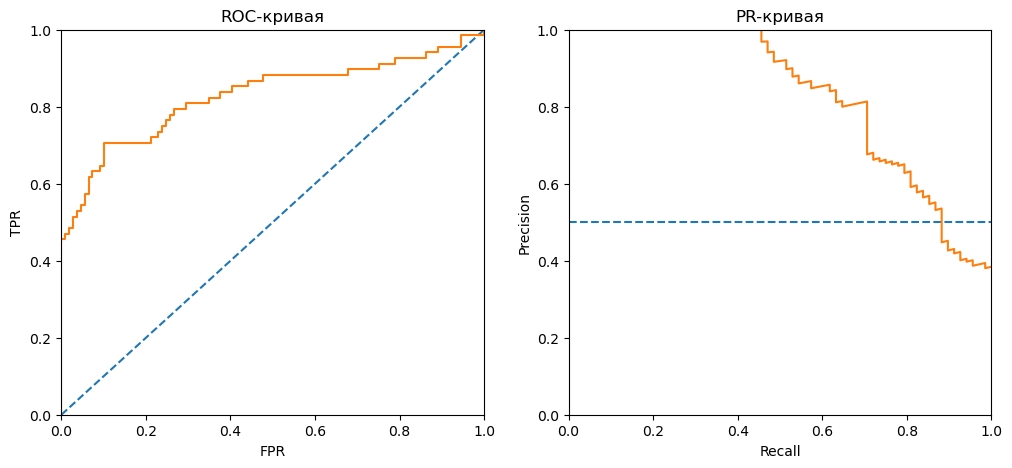

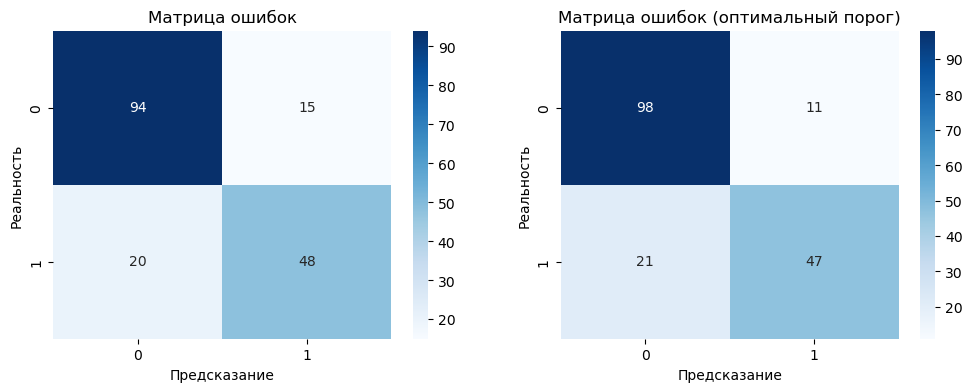

In [106]:
visualize(y_test, y_probs);

### Градиентный спуск в sklearn

In [107]:
sgd = SGDClassifier(random_state=177013, penalty=None, loss='log_loss', learning_rate='constant', eta0=1e-3)

In [108]:
sgd.fit(X_train_b, y_train)

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              penalty=None, random_state=177013)

In [109]:
y_probs = sgd.predict_proba(X_test_b)
y_pred = sgd.predict(X_test_b)

ROC_AUC: 0.83, AP (PR_AUC): 0.84, наилучший F1: 0.78 с порогом 0.54 (accuracy 0.84)


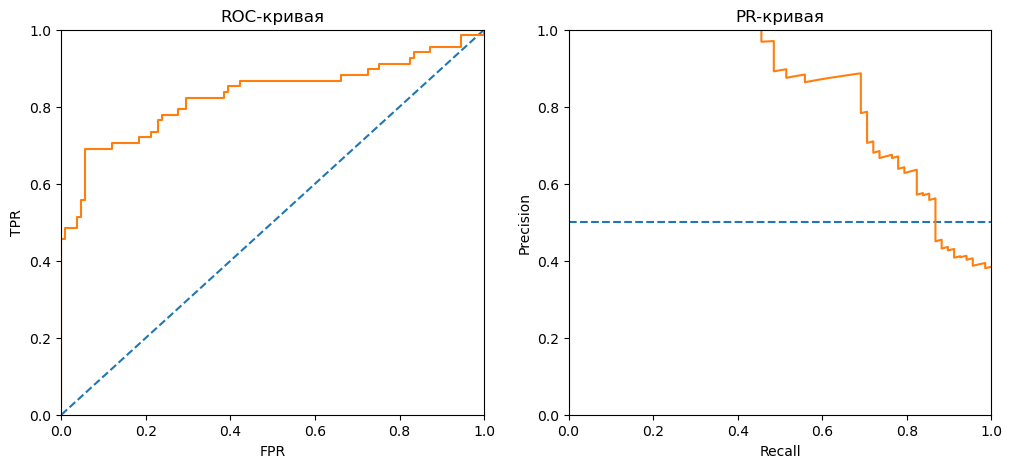

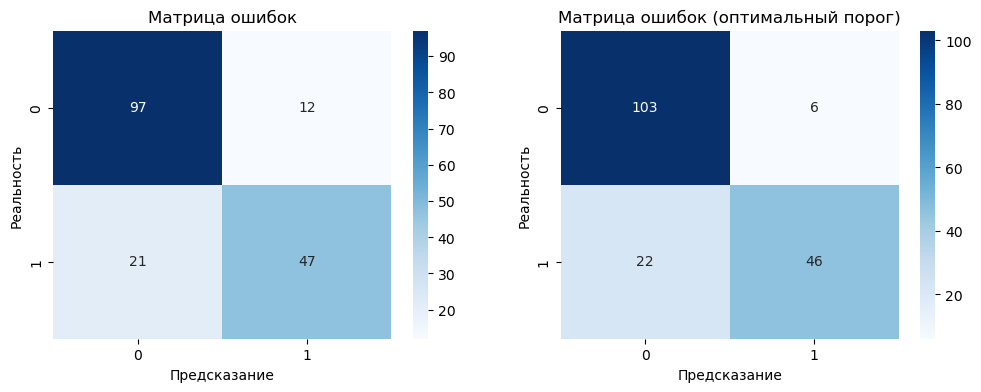

In [110]:
visualize(y_test, y_probs[:,1]);

## Регуляризация

In [194]:
lr = LogisticRegression(random_state=177013, penalty='l2')

In [195]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=177013)

In [196]:
y_probs = lr.predict_proba(X_test)

In [197]:
y_probs[:5]

array([[0.44969784, 0.55030216],
       [0.9164981 , 0.0835019 ],
       [0.48303792, 0.51696208],
       [0.87864425, 0.12135575],
       [0.09004427, 0.90995573]])

ROC_AUC: 0.83, AP (PR_AUC): 0.83, наилучший F1: 0.74 с порогом 0.55 (accuracy 0.82)


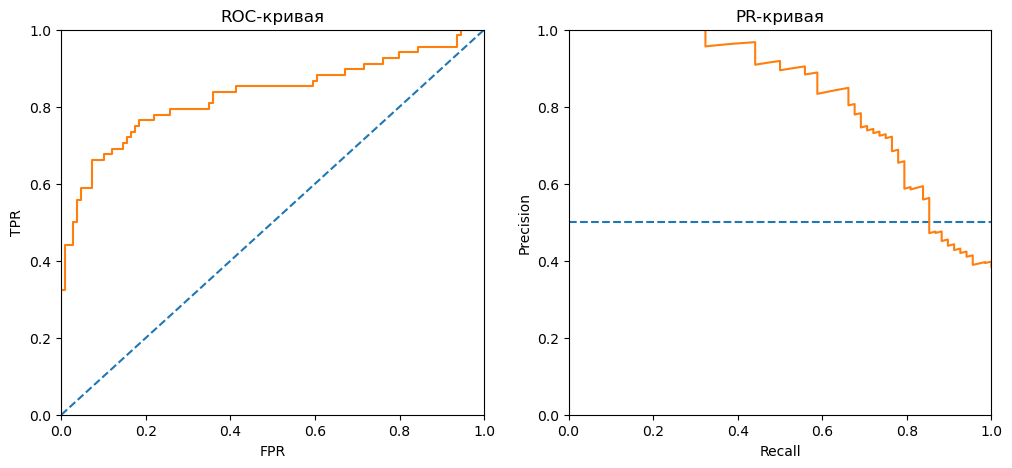

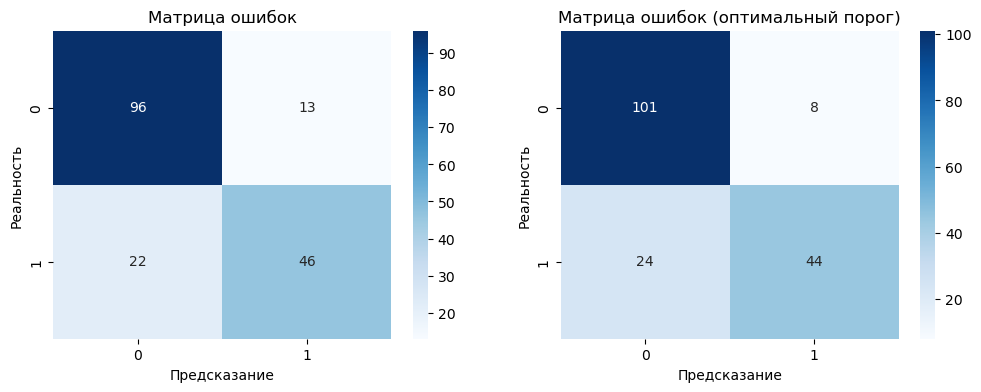

In [198]:
visualize(y_test, y_probs[:,1]);

## Допущения логистической регрессии

По сравнению с обычной линейной регрессией, логистическая НЕ требует:

- гомоскедастичности;
- нормальности ошибок;
- поскольку результат проходит через логистическую функцию, линейная зависимость нужна для логитов, а не самого целевого признака, который бинарен.

# Домашнее задание

## Easy

С помощью sklearn можно генерировать простые датасеты для тестирования моделей:

In [200]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=20, n_informative=10, n_classes=2)
X_train, y_train = X[:8000], y[:8000]
X_test, y_test = X[8000:], y[8000:]

Воспользуйтесь примером из урока и постройте модель логистической регрессии. Проверьте метрику F1 с порогом по умолчанию.

In [202]:
# Ваш код ниже:


## Normal

Вернитесь к датасету о клиентах банка. Подумайте, как преобразовать категории в числа (если не справитесь, можете их удалить, мы рассмотрим этот вопрос подробнее на следующем уроке).

Выделите обучающую и валидационную выборки.

Постройте модель логистической регрессии для предсказания признака `Exited`.

In [203]:
# Ваш код ниже:


Проверьте метрику F1 с порогом по умолчанию. Попробуйте найти хороший порог классификации с помощью PR-кривой.

In [204]:
# Ваш код ниже:


Напишите краткий вывод. Хорошо ли работает модель? Если нет, то как вы думаете, почему?

Вывод: 

## Hard

In [236]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10000, n_features=20, n_informative=10)
X_train, y_train = X[:8000], y[:8000]
X_test, y_test = X[8000:], y[8000:]

1. Постройте модель линейной регрессии. Оцените метрику на тестовой выборке.

In [231]:
# Ваш код ниже:


2. Сгенерируйте случайную матрицу 20х20 (можно воспользоваться `sklearn.datasets.make_spd_matrix()`). Проверьте ее на невырожденность (`np.linalg.det()` не должен равняться 0).

    Умножьте X_train и X_test на эту матрицу. Постройте модель линейной регрессии по этим преобразованным данным.

    Проверьте метрику. Что вы наблюдаете?

In [231]:
# Ваш код ниже:


С помощью линейной алгебры и формул линейной регрессии объясните, почему так происходит.